# ANÁLISE SOBRE A REMUNERAÇÃO DOS SERVIDORES FEDERAIS CIVIS E MILITARES

#### Por: Fabrício Barbosa
#### Pesquisa realizada para suporte em publicação de artigo em blog 
#### Fonte: portaltransparencia.gov.br

## 1 - QUESTÃO DE NEGÓCIO

### Relatório de geração de insights para elaboração de artigo jornalístico 

## 2 - PROBLEMAS

### Qual é o custo da União com a remuneração dos servidores?
### Quem custa mais para o Estado Brasileiro: os civis ou os militares?
### Em média, quais órgãos e cargos são bem mais remunerados?


##  3 - COLETA DOS DADOS

In [1]:
# ARQUIVO COM OS DADOS BAIXADOS DA FONTE CITADA PARA O SERVIDOR LOCAL
#IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline 

In [2]:
df_civis_dados = pd.read_csv('201912_Cadastro.csv',sep = ';', encoding = 'latin1')
df_civis_remun = pd.read_csv('201912_Remuneracao.csv', sep = ';' , encoding = 'latin1')
df_militar_dados = pd.read_csv('201912_CadastroMilitares.csv' , sep = ';', encoding = 'latin1')
df_militar_remun = pd.read_csv ('201912_RemuneracaoMilitares.csv' , sep = ';' , encoding = 'latin1')

C:\Users\sfsrj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10,12,23,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sfsrj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sfsrj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,29,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 4 - LIMPEZA DOS DADOS

### 4.1 - DIMENSÕES DOS DATASETS

In [3]:
df_civis_dados.shape

(776072, 42)

In [4]:
df_civis_remun.shape

(556726, 39)

In [5]:
df_militar_dados.shape

(366703, 42)

In [6]:
df_militar_remun.shape

(362446, 39)

### 4.2 - CONHECENDO AS COLUNAS E REGISTROS ÚNICOS

In [7]:
df_civis_dados.nunique()

Id_SERVIDOR_PORTAL                      657735
NOME                                    644037
CPF                                     469227
MATRICULA                                  100
DESCRICAO_CARGO                           2159
CLASSE_CARGO                                34
REFERENCIA_CARGO                             2
PADRAO_CARGO                               218
NIVEL_CARGO                                174
SIGLA_FUNCAO                                45
NIVEL_FUNCAO                               134
FUNCAO                                      46
CODIGO_ATIVIDADE                           520
ATIVIDADE                                  393
OPCAO_PARCIAL                                3
COD_UORG_LOTACAO                         43594
UORG_LOTACAO                             37830
COD_ORG_LOTACAO                            295
ORG_LOTACAO                                294
COD_ORGSUP_LOTACAO                          18
ORGSUP_LOTACAO                              18
COD_UORG_EXER

In [8]:
df_civis_remun.nunique()

ANO                                                                                3
MES                                                                                1
Id_SERVIDOR_PORTAL                                                            556725
CPF                                                                           414527
NOME                                                                          545776
REMUNERAÇÃO BÁSICA BRUTA (R$)                                                  95039
REMUNERAÇÃO BÁSICA BRUTA (U$)                                                      1
ABATE-TETO (R$)                                                                  555
ABATE-TETO (U$)                                                                    1
GRATIFICAÇÃO NATALINA (R$)                                                     51238
GRATIFICAÇÃO NATALINA (U$)                                                         1
ABATE-TETO DA GRATIFICAÇÃO NATALINA (R$)                         

In [9]:
df_militar_dados.nunique()

Id_SERVIDOR_PORTAL                      363601
NOME                                    350819
CPF                                     280358
MATRICULA                                   93
DESCRICAO_CARGO                            109
CLASSE_CARGO                                22
REFERENCIA_CARGO                             2
PADRAO_CARGO                                37
NIVEL_CARGO                                 17
SIGLA_FUNCAO                                11
NIVEL_FUNCAO                                24
FUNCAO                                      11
CODIGO_ATIVIDADE                            38
ATIVIDADE                                   31
OPCAO_PARCIAL                                2
COD_UORG_LOTACAO                           277
UORG_LOTACAO                               268
COD_ORG_LOTACAO                             60
ORG_LOTACAO                                 60
COD_ORGSUP_LOTACAO                           7
ORGSUP_LOTACAO                               7
COD_UORG_EXER

In [10]:
df_militar_remun.nunique()

ANO                                                                                3
MES                                                                                1
Id_SERVIDOR_PORTAL                                                            362445
CPF                                                                           279766
NOME                                                                          349705
REMUNERAÇÃO BÁSICA BRUTA (R$)                                                   6389
REMUNERAÇÃO BÁSICA BRUTA (U$)                                                     25
ABATE-TETO (R$)                                                                    6
ABATE-TETO (U$)                                                                    1
GRATIFICAÇÃO NATALINA (R$)                                                      1712
GRATIFICAÇÃO NATALINA (U$)                                                         1
ABATE-TETO DA GRATIFICAÇÃO NATALINA (R$)                         

### 4.3 - IDENTIFICANDO E REMOVENDO DADOS DUPLICADOS

In [11]:
df_civis_dados.duplicated().sum()

7659

In [12]:
df_civis_dados.drop_duplicates(inplace =True)
df_civis_dados.duplicated().sum()

0

In [13]:
df_civis_remun.duplicated().sum()

0

In [14]:
df_militar_dados.duplicated().sum()

0

In [15]:
df_militar_remun.duplicated().sum()

0

### 4.4 - OTIMIZANDO OS DATASETS ELIMINANDO COLUNAS SEM INTERESSE

In [16]:
df_civis_dados.drop(columns =['NOME','CPF','MATRICULA','CLASSE_CARGO','REFERENCIA_CARGO','PADRAO_CARGO','SIGLA_FUNCAO',
                             'NIVEL_FUNCAO','FUNCAO','CODIGO_ATIVIDADE','ATIVIDADE','OPCAO_PARCIAL','COD_UORG_LOTACAO',
                             'UORG_LOTACAO','COD_ORG_LOTACAO','ORG_LOTACAO','COD_ORGSUP_LOTACAO','ORGSUP_LOTACAO',
                             'COD_UORG_EXERCICIO','UORG_EXERCICIO','COD_ORG_EXERCICIO','COD_ORGSUP_EXERCICIO',
                             'ORGSUP_EXERCICIO','TIPO_VINCULO','SITUACAO_VINCULO','DATA_INICIO_AFASTAMENTO',
                             'DATA_TERMINO_AFASTAMENTO','REGIME_JURIDICO','DATA_NOMEACAO_CARGOFUNCAO','DATA_INGRESSO_ORGAO',
                             'DOCUMENTO_INGRESSO_SERVICOPUBLICO','DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO','DIPLOMA_INGRESSO_CARGOFUNCAO',
                             'DIPLOMA_INGRESSO_ORGAO','DIPLOMA_INGRESSO_SERVICOPUBLICO'],inplace =True)
df_civis_dados.head()

,Id_SERVIDOR_PORTAL,DESCRICAO_CARGO,NIVEL_CARGO,ORG_EXERCICIO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,UF_EXERCICIO
0,5116961,BIBLIOTECARIO-DOCUMENTALISTA,0.0,Instituto Federal do Ceará,40 HORAS SEMANAIS,11/02/2009,CE
1,201964,Sem informação,-1.0,Banco Central do Brasil,40 HORAS SEMANAIS,10/06/2019,-1
2,201964,ANALISTA DO BANCO CENTRAL,NaN,Banco Central do Brasil,40 HORAS SEMANAIS,05/01/1998,DF
3,4405000,Sem informação,-1.0,Universidade Federal do Pará,DEDICACAO EXCLUSIVA,13/04/2016,-1
4,4405000,PROFESSOR DO MAGISTERIO SUPERIOR,604.0,Universidade Federal do Pará,DEDICACAO EXCLUSIVA,01/03/2013,-1


In [17]:
df_civis_remun.drop(columns =['ANO','MES','CPF','NOME','REMUNERAÇÃO BÁSICA BRUTA (U$)','ABATE-TETO (R$)','ABATE-TETO (U$)',
                             'GRATIFICAÇÃO NATALINA (R$)','GRATIFICAÇÃO NATALINA (U$)','ABATE-TETO DA GRATIFICAÇÃO NATALINA (R$)',
                             'ABATE-TETO DA GRATIFICAÇÃO NATALINA (U$)','FÉRIAS (R$)','FÉRIAS (U$)','OUTRAS REMUNERAÇÕES EVENTUAIS (R$)',
                             'OUTRAS REMUNERAÇÕES EVENTUAIS (U$)','IRRF (R$)','IRRF (U$)','PSS/RPGS (R$)','PSS/RPGS (U$)',
                             'DEMAIS DEDUÇÕES (R$)','DEMAIS DEDUÇÕES (U$)','PENSÃO MILITAR (R$)','PENSÃO MILITAR (U$)',
                             'FUNDO DE SAÚDE (R$)','FUNDO DE SAÚDE (U$)','TAXA DE OCUPAÇÃO IMÓVEL FUNCIONAL (R$)',
                             'TAXA DE OCUPAÇÃO IMÓVEL FUNCIONAL (U$)','REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (U$)',
                             'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (R$)(*)',
                             'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (U$)(*)',
                             'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (R$)(*)',
                             'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (U$)(*)',
                             'VERBAS INDENIZATÓRIAS PROGRAMA DESLIGAMENTO VOLUNTÁRIO  MP 792/2017 (R$)',
                             'VERBAS INDENIZATÓRIAS PROGRAMA DESLIGAMENTO VOLUNTÁRIO  MP 792/2017 (U$)',
                             'TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*)','TOTAL DE VERBAS INDENIZATÓRIAS (U$)(*)'],inplace =True)
df_civis_remun.head()

,Id_SERVIDOR_PORTAL,REMUNERAÇÃO BÁSICA BRUTA (R$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)
0,5116961.0,"7967,90","6458,52"
1,201964.0,"34006,68","25821,19"
2,4405000.0,"14249,03","10141,35"
3,4915841.0,"21007,45","33621,26"
4,5105492.0,"5896,78","9373,53"


In [18]:
df_militar_dados.drop(columns =['NOME','CPF','MATRICULA','CLASSE_CARGO','REFERENCIA_CARGO','PADRAO_CARGO','SIGLA_FUNCAO',
                             'NIVEL_FUNCAO','FUNCAO','CODIGO_ATIVIDADE','ATIVIDADE','OPCAO_PARCIAL','COD_UORG_LOTACAO',
                             'UORG_LOTACAO','COD_ORG_LOTACAO','ORG_LOTACAO','COD_ORGSUP_LOTACAO','ORGSUP_LOTACAO',
                             'COD_UORG_EXERCICIO','UORG_EXERCICIO','COD_ORG_EXERCICIO','COD_ORGSUP_EXERCICIO',
                             'ORGSUP_EXERCICIO','TIPO_VINCULO','SITUACAO_VINCULO','DATA_INICIO_AFASTAMENTO',
                             'DATA_TERMINO_AFASTAMENTO','REGIME_JURIDICO','DATA_NOMEACAO_CARGOFUNCAO','DATA_INGRESSO_ORGAO',
                             'DOCUMENTO_INGRESSO_SERVICOPUBLICO','DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO','DIPLOMA_INGRESSO_CARGOFUNCAO',
                             'DIPLOMA_INGRESSO_ORGAO','DIPLOMA_INGRESSO_SERVICOPUBLICO'],inplace =True)
df_militar_dados.head()

,Id_SERVIDOR_PORTAL,DESCRICAO_CARGO,NIVEL_CARGO,ORG_EXERCICIO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,UF_EXERCICIO
0,4806495,Primeiro-Tenente,0,Comando da Aeronáutica,DSPN. PERMANENTE,NaN,-1
1,8903134,Terceiro-Sargento,0,Comando da Aeronáutica,DSPN. PERMANENTE,NaN,-1
2,9404736,"Marinheiro, Soldado Fuzileiro Naval",0,Comando da Marinha,DSPN. PERMANENTE,NaN,-1
3,86040592,Soldado-Recruta,0,Comando do Exército,DSPN. PERMANENTE,NaN,-1
4,2504309,Terceiro-Sargento,0,Comando da Marinha,DSPN. PERMANENTE,NaN,-1


In [19]:
df_militar_remun.drop(columns =['ANO','MES','CPF','NOME','REMUNERAÇÃO BÁSICA BRUTA (U$)','ABATE-TETO (R$)','ABATE-TETO (U$)',
                             'GRATIFICAÇÃO NATALINA (R$)','GRATIFICAÇÃO NATALINA (U$)','ABATE-TETO DA GRATIFICAÇÃO NATALINA (R$)',
                             'ABATE-TETO DA GRATIFICAÇÃO NATALINA (U$)','FÉRIAS (R$)','FÉRIAS (U$)','OUTRAS REMUNERAÇÕES EVENTUAIS (R$)',
                             'OUTRAS REMUNERAÇÕES EVENTUAIS (U$)','IRRF (R$)','IRRF (U$)','PSS/RPGS (R$)','PSS/RPGS (U$)',
                             'DEMAIS DEDUÇÕES (R$)','DEMAIS DEDUÇÕES (U$)','PENSÃO MILITAR (R$)','PENSÃO MILITAR (U$)',
                             'FUNDO DE SAÚDE (R$)','FUNDO DE SAÚDE (U$)','TAXA DE OCUPAÇÃO IMÓVEL FUNCIONAL (R$)',
                             'TAXA DE OCUPAÇÃO IMÓVEL FUNCIONAL (U$)','REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (U$)',
                             'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (R$)(*)',
                             'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (U$)(*)',
                             'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (R$)(*)',
                             'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (U$)(*)',
                             'VERBAS INDENIZATÓRIAS PROGRAMA DESLIGAMENTO VOLUNTÁRIO  MP 792/2017 (R$)',
                             'VERBAS INDENIZATÓRIAS PROGRAMA DESLIGAMENTO VOLUNTÁRIO  MP 792/2017 (U$)',
                             'TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*)','TOTAL DE VERBAS INDENIZATÓRIAS (U$)(*)'],inplace =True)
df_militar_remun.head()

,Id_SERVIDOR_PORTAL,REMUNERAÇÃO BÁSICA BRUTA (R$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)
0,4806495.0,"11130,75","8479,56"
1,8903134.0,"5049,00","4108,35"
2,9404736.0,"1950,00","1401,19"
3,86040592.0,"956,00","2026,72"
4,2504309.0,"5967,00","3146,20"


### 4.5 - VERIFICANDO OS TIPOS

In [20]:
df_civis_dados.dtypes

Id_SERVIDOR_PORTAL             int64
DESCRICAO_CARGO               object
NIVEL_CARGO                  float64
ORG_EXERCICIO                 object
JORNADA_DE_TRABALHO           object
DATA_INGRESSO_CARGOFUNCAO     object
UF_EXERCICIO                  object
dtype: object

In [21]:
df_civis_remun.dtypes

Id_SERVIDOR_PORTAL                             float64
REMUNERAÇÃO BÁSICA BRUTA (R$)                   object
REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)     object
dtype: object

In [22]:
df_civis_remun['REMUNERAÇÃO BÁSICA BRUTA (R$)'] = df_civis_remun['REMUNERAÇÃO BÁSICA BRUTA (R$)'].str.replace(',','.')
df_civis_remun['REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)'] = df_civis_remun['REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)'].str.replace(',','.')

In [23]:
df_civis_remun['REMUNERAÇÃO BÁSICA BRUTA (R$)'] = df_civis_remun['REMUNERAÇÃO BÁSICA BRUTA (R$)'].astype('float')
df_civis_remun['REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)'] = df_civis_remun['REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)'].astype('float')
df_civis_remun.dtypes

Id_SERVIDOR_PORTAL                             float64
REMUNERAÇÃO BÁSICA BRUTA (R$)                  float64
REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)    float64
dtype: object

In [24]:
df_militar_dados.dtypes

Id_SERVIDOR_PORTAL            int64
DESCRICAO_CARGO              object
NIVEL_CARGO                   int64
ORG_EXERCICIO                object
JORNADA_DE_TRABALHO          object
DATA_INGRESSO_CARGOFUNCAO    object
UF_EXERCICIO                 object
dtype: object

In [25]:
df_militar_remun.dtypes

Id_SERVIDOR_PORTAL                             float64
REMUNERAÇÃO BÁSICA BRUTA (R$)                   object
REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)     object
dtype: object

In [26]:
df_militar_remun['REMUNERAÇÃO BÁSICA BRUTA (R$)'] = df_militar_remun['REMUNERAÇÃO BÁSICA BRUTA (R$)'].str.replace(',','.')
df_militar_remun['REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)'] = df_militar_remun['REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)'].str.replace(',','.')

In [27]:
df_militar_remun['REMUNERAÇÃO BÁSICA BRUTA (R$)'] = df_militar_remun['REMUNERAÇÃO BÁSICA BRUTA (R$)'].astype('float')
df_militar_remun['REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)'] = df_militar_remun['REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)'].astype('float')
df_militar_remun.dtypes

Id_SERVIDOR_PORTAL                             float64
REMUNERAÇÃO BÁSICA BRUTA (R$)                  float64
REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)    float64
dtype: object

### 4.6 - VERIFICANDO DADOS NULOS OU AUSENTES

In [28]:
df_civis_dados.isnull().sum()

Id_SERVIDOR_PORTAL               0
DESCRICAO_CARGO                  0
NIVEL_CARGO                   3661
ORG_EXERCICIO                    0
JORNADA_DE_TRABALHO              0
DATA_INGRESSO_CARGOFUNCAO    68128
UF_EXERCICIO                     0
dtype: int64

In [29]:
df_civis_remun.isnull().sum()

Id_SERVIDOR_PORTAL                             1
REMUNERAÇÃO BÁSICA BRUTA (R$)                  1
REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)    1
dtype: int64

In [30]:
df_civis_remun.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [31]:
df_civis_remun.isnull().sum()

Id_SERVIDOR_PORTAL                             0
REMUNERAÇÃO BÁSICA BRUTA (R$)                  0
REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)    0
dtype: int64

In [32]:
df_militar_dados.isnull().sum()

Id_SERVIDOR_PORTAL                0
DESCRICAO_CARGO                   0
NIVEL_CARGO                       0
ORG_EXERCICIO                     0
JORNADA_DE_TRABALHO               0
DATA_INGRESSO_CARGOFUNCAO    364142
UF_EXERCICIO                      0
dtype: int64

In [33]:
df_militar_remun.isnull().sum()

Id_SERVIDOR_PORTAL                             1
REMUNERAÇÃO BÁSICA BRUTA (R$)                  1
REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)    1
dtype: int64

In [34]:
df_militar_remun.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [35]:
df_militar_remun.isnull().sum()

Id_SERVIDOR_PORTAL                             0
REMUNERAÇÃO BÁSICA BRUTA (R$)                  0
REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)    0
dtype: int64

### 4.7 - UNINDO AS TABELAS DADOS E REMUNERAÇÃO

In [36]:
df_civis = pd.merge(df_civis_dados,df_civis_remun, on = 'Id_SERVIDOR_PORTAL', how = 'right')
df_civis.head()

,Id_SERVIDOR_PORTAL,DESCRICAO_CARGO,NIVEL_CARGO,ORG_EXERCICIO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,UF_EXERCICIO,REMUNERAÇÃO BÁSICA BRUTA (R$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)
0,5116961,BIBLIOTECARIO-DOCUMENTALISTA,0.0,Instituto Federal do Ceará,40 HORAS SEMANAIS,11/02/2009,CE,7967.90,6458.52
1,201964,Sem informação,-1.0,Banco Central do Brasil,40 HORAS SEMANAIS,10/06/2019,-1,34006.68,25821.19
2,201964,ANALISTA DO BANCO CENTRAL,NaN,Banco Central do Brasil,40 HORAS SEMANAIS,05/01/1998,DF,34006.68,25821.19
3,4405000,Sem informação,-1.0,Universidade Federal do Pará,DEDICACAO EXCLUSIVA,13/04/2016,-1,14249.03,10141.35
4,4405000,PROFESSOR DO MAGISTERIO SUPERIOR,604.0,Universidade Federal do Pará,DEDICACAO EXCLUSIVA,01/03/2013,-1,14249.03,10141.35


In [37]:
df_militar = pd.merge(df_militar_dados, df_militar_remun, on = 'Id_SERVIDOR_PORTAL', how = 'right' )
df_militar.head()

,Id_SERVIDOR_PORTAL,DESCRICAO_CARGO,NIVEL_CARGO,ORG_EXERCICIO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,UF_EXERCICIO,REMUNERAÇÃO BÁSICA BRUTA (R$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)
0,4806495,Primeiro-Tenente,0,Comando da Aeronáutica,DSPN. PERMANENTE,NaN,-1,11130.75,8479.56
1,8903134,Terceiro-Sargento,0,Comando da Aeronáutica,DSPN. PERMANENTE,NaN,-1,5049.00,4108.35
2,9404736,"Marinheiro, Soldado Fuzileiro Naval",0,Comando da Marinha,DSPN. PERMANENTE,NaN,-1,1950.00,1401.19
3,86040592,Soldado-Recruta,0,Comando do Exército,DSPN. PERMANENTE,NaN,-1,956.00,2026.72
4,2504309,Terceiro-Sargento,0,Comando da Marinha,DSPN. PERMANENTE,NaN,-1,5967.00,3146.20


## 5 - EXPLORANDO OS DADOS

### 5.1 -  QUANTIDADE DE SERVIDORES NAS PLANILHAS DE REMUNERAÇÃO

In [38]:
quant_civis = df_civis['Id_SERVIDOR_PORTAL'].value_counts().sum()
print ('Aparecem {} servidores CIVIS como membros de serviço público federal'. format(quant_civis))

Aparecem 652590 servidores CIVIS como membros de serviço público federal


In [39]:
quant_militar = df_militar['Id_SERVIDOR_PORTAL'].value_counts().sum()
print('Há {} MILITARES registrados pelo governo federal'. format(quant_militar))

Há 365546 MILITARES registrados pelo governo federal


### 5.2 - COMPARAÇÃO ENTRE OS TOTAIS DE SERVIDORES CIVIS (ÁREA AZUL) E MILITARES (ÁREA DO RETÂNGULO COM BORDA ESCURA)

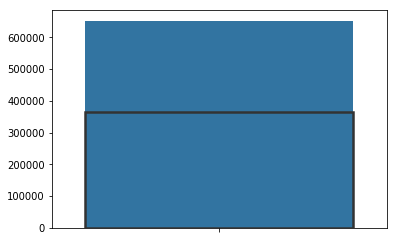

In [40]:
sns.barplot(quant_civis, orient = 'v')
sns.barplot(quant_militar,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".8", edgecolor=".2", orient = 'v')



### 5.3 - RENDA BRUTA MÉDIA

In [41]:
media_civis = df_civis['REMUNERAÇÃO BÁSICA BRUTA (R$)'].mean()
print ('A remuneração bruta média dos Servidores públicos CIVIS no BRASIL é de R$ {:.2f}'.format(media_civis))

A remuneração bruta média dos Servidores públicos CIVIS no BRASIL é de R$ 10758.33


In [42]:
media_militar = df_militar['REMUNERAÇÃO BÁSICA BRUTA (R$)'].mean()
print ('A remuneração bruta média dos Servidores públicos MILITARES no BRASIL é de R$ {:.2f}'.format(media_militar))

A remuneração bruta média dos Servidores públicos MILITARES no BRASIL é de R$ 5116.42


### 5.4 - REMUNERAÇÕES MÁXIMAS

In [43]:
max_civis = df_civis['REMUNERAÇÃO BÁSICA BRUTA (R$)'].max()
print('R$ {:.2f} é a maior remuneração bruta paga a um servidor civil'.format(max_civis))

R$ 64795.84 é a maior remuneração bruta paga a um servidor civil


In [44]:
max_militar = df_militar['REMUNERAÇÃO BÁSICA BRUTA (R$)'].max()
print('R$ {:.2f} é a maior remuneração bruta paga a um servidor militar'.format(max_militar))

R$ 49544.25 é a maior remuneração bruta paga a um servidor militar


### 5.5 - DISTRIBUIÇÃO DAS REMUNERAÇÕES

#### CIVIS

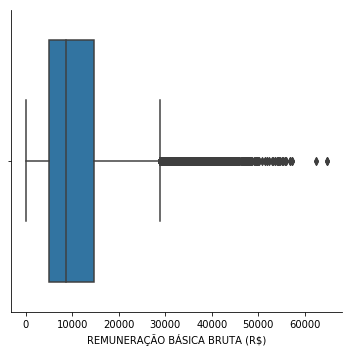

In [45]:
sns.catplot(x='REMUNERAÇÃO BÁSICA BRUTA (R$)', kind = 'box', data = df_civis)

#### MILITARES

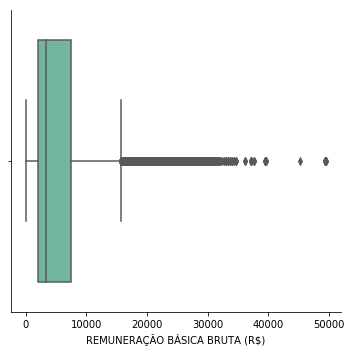

In [145]:
sns.catplot(x='REMUNERAÇÃO BÁSICA BRUTA (R$)', kind = 'box',palette = 'Set2', data = df_militar)

### 5.6 - MÉDIA DE REMUNERAÇÃO POR ÓRGÃO

#### AS 10 MAIORES MÉDIAS DE REMUNERAÇÃO POR ÓRGÃO (CIVIS)

Text(0.5,0,'REMUNERAÇÃO MÉDIA')

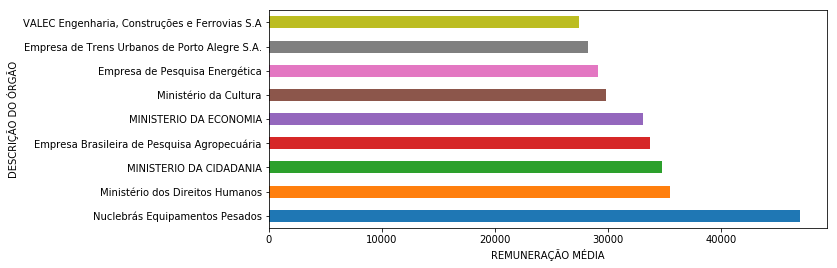

In [136]:
media_por_org_civis = df_civis['REMUNERAÇÃO BÁSICA BRUTA (R$)'].groupby(df_civis['ORG_EXERCICIO']).mean()
plt.figure(figsize = (10,4))
media_por_org_civis.sort_values(ascending=False)[0:9].plot.barh()
plt.ylabel('DESCRIÇÃO DO ÓRGÃO')
plt.xlabel('REMUNERAÇÃO MÉDIA')

#### AS 10 MAIORES MÉDIAS DE REMUNERAÇÃO POR ÓRGÃO (MILITARES)

Text(0.5,0,'REMUNERAÇÃO MÉDIA')

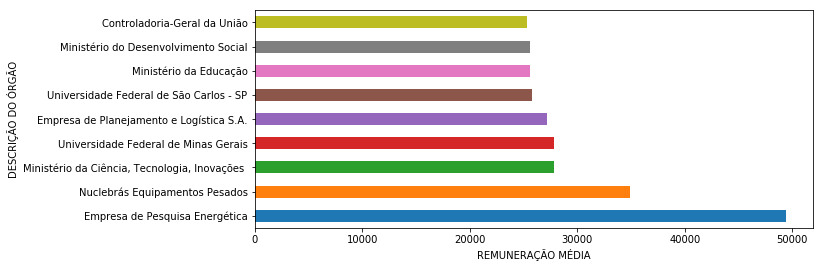

In [138]:
media_por_org_militar = df_militar['REMUNERAÇÃO BÁSICA BRUTA (R$)'].groupby(df_militar['ORG_EXERCICIO']).mean()
plt.figure(figsize = (10,4))
media_por_org_militar.sort_values(ascending = False)[0:9].plot.barh()
plt.ylabel('DESCRIÇÃO DO ÓRGÃO')
plt.xlabel('REMUNERAÇÃO MÉDIA')

### 5.7  -  MÉDIA DE REMUNERAÇÃO POR CARGO

#### AS 10 MAIORES REMUNERAÇÕES POR CARGO (CIVIS)

Text(0,0.5,'REMUNERAÇÃO BRUTA')

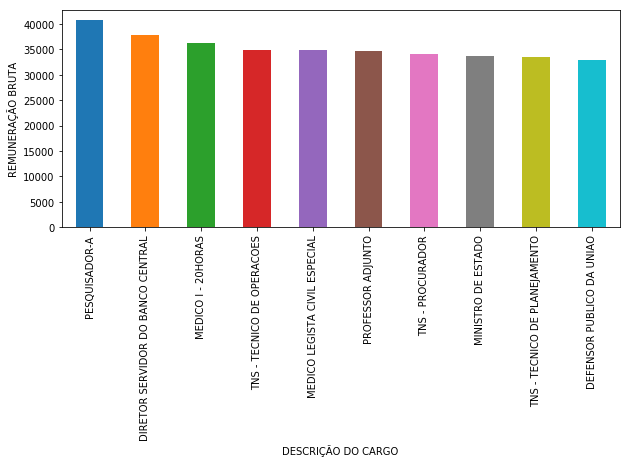

In [122]:
media_por_cargo_civil = df_civis['REMUNERAÇÃO BÁSICA BRUTA (R$)'].groupby(df_civis['DESCRICAO_CARGO']).mean()
plt.figure(figsize = (10,4))
media_por_cargo_civil.sort_values(ascending = False)[0:10].plot.bar()
plt.xlabel('DESCRIÇÃO DO CARGO')
plt.ylabel('REMUNERAÇÃO BRUTA')

#### AS 10 MAIORES REMUNERAÇÕES POR CARGO (MILITARES)

Text(0,0.5,'REMUNERAÇÃO BRUTA')

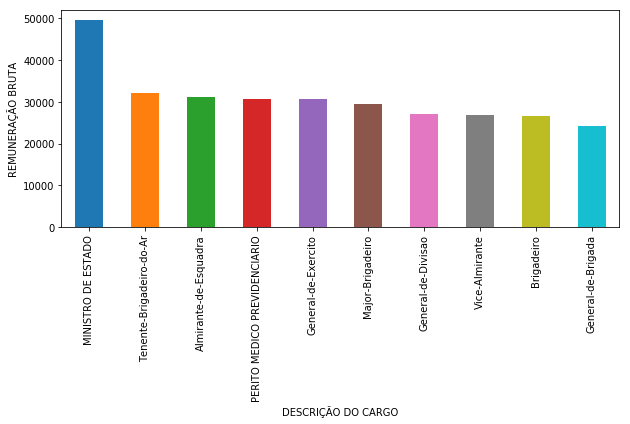

In [123]:
media_por_cargo_militar = df_militar['REMUNERAÇÃO BÁSICA BRUTA (R$)'].groupby(df_militar['DESCRICAO_CARGO']).mean()
plt.figure(figsize = (10,4))
media_por_cargo_militar.sort_values(ascending = False)[0:10].plot.bar()
plt.xlabel('DESCRIÇÃO DO CARGO')
plt.ylabel('REMUNERAÇÃO BRUTA')

### 5.8  - TOTAL MENSAL GASTO PELA UNIÃO COM SERVIDORES

In [149]:
sum_rem_civis = df_civis['REMUNERAÇÃO BÁSICA BRUTA (R$)'].sum()
sum_rem_mil = df_militar['REMUNERAÇÃO BÁSICA BRUTA (R$)'].sum()
print ('A União gasta por mês R${:.2f} com SERVIDORES CIVIS  e R${:.2f} com SERVIDORES MILITARES'.format(sum_rem_civis,sum_rem_mil))

A União gasta por mês R$7020780255.27 com SERVIDORES CIVIS  e R$1870285925.06 com SERVIDORES MILITARES
